In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
init_df = pd.read_json("apps.json")
init_df.head()

,Android application info,Rating scores,App installs,Rating values,Related apps,Download level stats,Meta data
0,"{'Title': 'Who Is The Killer: Dark Room', 'Dev...","{'Total ratings': '32799', 'Growth (30 days)':...","{'Installs (achieved)': '500,000+', 'Installs ...","{'5 star ratings': '17,281', '4 star ratings':...","[Sentence: Detective & Thriller, Who Is The Ki...","{'5000': '2015-06-20:', '10000': '2015-07-02:'...",{'Service link': 'https://www.androidrank.org/...
1,"{'Title': 'I am innocent', 'Developer': 'Long ...","{'Total ratings': '358372', 'Growth (30 days)'...","{'Installs (achieved)': '10,000,000+', 'Instal...","{'5 star ratings': '188,906', '4 star ratings'...","[Meridian 157: Prologue, Who is the Killer? Ep...","{'1000000': '2018-03-27:', '5000000': '2018-08...",{'Service link': 'https://www.androidrank.org/...
2,"{'Title': 'Smashy City - Destruction Game', 'D...","{'Total ratings': '262219', 'Growth (30 days)'...","{'Installs (achieved)': '10,000,000+', 'Instal...","{'5 star ratings': '207,795', '4 star ratings'...","[Ape TD: Tower Takeover, Run and Gun - Endless...","{'10000': '2016-03-20:', '100000': '2016-03-27...",{'Service link': 'https://www.androidrank.org/...
3,"{'Title': 'Mutant Fighting Cup 2', 'Developer'...","{'Total ratings': '271578', 'Growth (30 days)'...","{'Installs (achieved)': '10,000,000+', 'Instal...","{'5 star ratings': '201,570', '4 star ratings'...","[Moto X3M Bike Race Game, Monster War - Battle...","{'100000': '2016-03-02:', '1000000': '2016-03-...",{'Service link': 'https://www.androidrank.org/...
4,"{'Title': 'Romantic Love Messages SMS App', 'D...","{'Total ratings': '3142', 'Growth (30 days)': ...","{'Installs (achieved)': '100,000+', 'Installs ...","{'5 star ratings': '2,308', '4 star ratings': ...","[Palm Reading & Fortune Teller, Word Search Bi...","{'50000': '2019-03-22:', '100000': '2020-07-02:'}",{'Service link': 'https://www.androidrank.org/...


In [62]:
aai_df = pd.json_normalize(init_df["Android application info"])
rs_df = pd.json_normalize(init_df["Rating scores"])
ai_df = pd.json_normalize(init_df["App installs"])
df = pd.concat([aai_df, rs_df, ai_df], axis=1)
df.head()

,Title,Developer,Category,Price,System,Total ratings,Growth (30 days),Growth (60 days),Average rating,Current market position by number of ratings,Installs (achieved),Installs (estimated)
0,Who Is The Killer: Dark Room,Long Jaunt,Game Puzzle,Free,Android,32799,0.0%,0.01%,4.12,21083,"500,000+","593,991"
1,I am innocent,Long Jaunt,Game Simulation,Free,Android,358372,0.0%,0.0%,3.96,3260,"10,000,000+","10,135,642"
2,Smashy City - Destruction Game,Ace Viral,Game Action,Free,Android,262219,0.0%,0.0%,4.57,4335,"10,000,000+","10,320,332"
3,Mutant Fighting Cup 2,Ace Viral,Game Action,Free,Android,271578,0.01%,0.04%,4.39,4196,"10,000,000+","16,306,290"
4,Romantic Love Messages SMS App,Touchzing Media Private Limited,Social,Free,Android,3142,0.08%,0.16%,4.46,72317,"100,000+","500,000"


In [63]:
df['Growth (30 days)'] = df['Growth (30 days)'].str.replace('%', '').astype(float)
df['Growth (60 days)'] = df['Growth (60 days)'].str.replace('%', '').astype(float)
df['Installs (achieved)'] = df['Installs (achieved)'].str.replace(',', '')
df['Installs (achieved)'] = df['Installs (achieved)'].str.replace('+', '').astype(float)
df["Total ratings"] = df["Total ratings"].astype(int)
df["Average rating"] = df["Average rating"].astype(float)
df["Current market position by number of ratings"] = df["Current market position by number of ratings"].astype(float)
df["Installs (estimated)"] = df["Installs (estimated)"].str.replace(',', "").astype(float)

C:\Users\olymp\AppData\Local\Temp\ipykernel_11904\78072528.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs (achieved)'] = df['Installs (achieved)'].str.replace('+', '').astype(float)


In [64]:
df = df[df["Category"].isin(['Game Action', 'Game Adventure', 'Game Arcade', 'Game Board', 'Game Card', 'Game Casino', 'Game Casual', 'Game Educational', 'Game Music','Game Puzzle', 'Game Racing', 'Game Role Playing', 'Game Simulation', 'Game Sports', 'Game Strategy', 'Game Trivia', 'Game Word'])]
df.head()

,Title,Developer,Category,Price,System,Total ratings,Growth (30 days),Growth (60 days),Average rating,Current market position by number of ratings,Installs (achieved),Installs (estimated)
0,Who Is The Killer: Dark Room,Long Jaunt,Game Puzzle,Free,Android,32799,0.00,0.01,4.12,21083.0,500000.0,593991.0
1,I am innocent,Long Jaunt,Game Simulation,Free,Android,358372,0.00,0.00,3.96,3260.0,10000000.0,10135642.0
2,Smashy City - Destruction Game,Ace Viral,Game Action,Free,Android,262219,0.00,0.00,4.57,4335.0,10000000.0,10320332.0
3,Mutant Fighting Cup 2,Ace Viral,Game Action,Free,Android,271578,0.01,0.04,4.39,4196.0,10000000.0,16306290.0
5,Dragon Epic - Idle & Merge,1SOFT,Game Arcade,Free,Android,48988,0.17,0.33,4.71,16174.0,5000000.0,9438193.0


In [65]:
df_60 = df.sort_values(by="Growth (60 days)", ascending=False)
df_30 = df.sort_values(by="Growth (30 days)", ascending=False)
df_6030 = df.sort_values(by=["Growth (30 days)", "Growth (60 days)"], ascending=False)
df_6030.head()

,Title,Developer,Category,Price,System,Total ratings,Growth (30 days),Growth (60 days),Average rating,Current market position by number of ratings,Installs (achieved),Installs (estimated)
3821,Truck Star,Century Games PTE. LTD.,Game Casual,Free,Android,33911,9328.05,0.00,4.63,20663.0,1000000.0,1000000.0
247,Zombie State: Roguelike FPS,MY.GAMES B.V.,Game Action,Free,Android,33465,5833.51,11667.02,4.45,20833.0,1000000.0,1000000.0
7831,아쿠아스토리,"Wemade Play Co.,Ltd.",Game Simulation,Free,Android,166810,2981.47,5962.94,4.29,6375.0,1000000.0,5000000.0
18643,Sword of Chaos - Меч Хаоса,Allstar Games,Game Action,Free,Android,289504,2951.83,5903.65,4.59,3985.0,1000000.0,5000000.0
9071,별이되어라! - 전략 수집형RPG,Com2uS Holdings,Game Role Playing,Free,Android,238932,2658.27,5316.54,4.35,4686.0,5000000.0,6906986.0


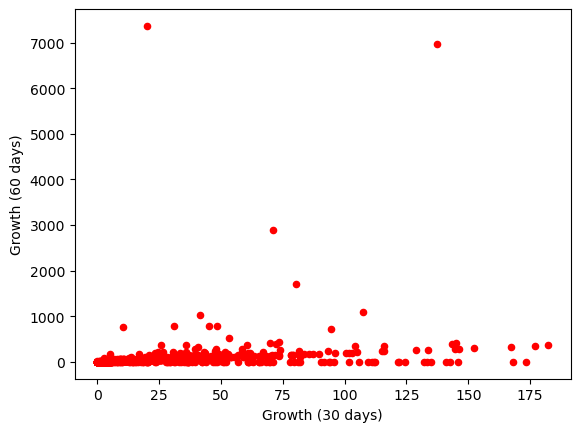

In [76]:
df_6030[50:].plot(kind='scatter', x='Growth (30 days)', y='Growth (60 days)', color='red')

# Показ графика
plt.show()
